Når du er ferdig med å installere jupyter notebook og satt det opp for bruk med Ekte Data kan du kjøre gjennom dette skriptet for å sjekke at alt er satt opp slik det skal. 

Denne koden går gjennom flere steg
- laster ned værdata fra yr.no via yr sin modul som gjør dette veldig enkelt for oss. 
- lager en enkel figur som presenterer dataene
- beregner akkumulert nedbør og presenterer dette i en ny figur
- beregner noe fancy basert på temperatur for å vise nytte
- lager en figur med temperatur sammen med en sinuskurve for å vise en måte å beskrive variasjon
- lager en figur som viser temperatur og nedbør sammen for å se om det er noen sammenheng. 

Så om det fremdeles er tid kan du prøve å gjøre alt dette med data fra der du er fra. 


##### Yr fungerer ikke, så bruker data fra seklima.no istedet

Last inn pakkene du trenger. Disse tre er alle veldig standard. `pandas` er veldig god på noen typer databinnlesing, det er det vi bruker denne pakken til her, men den er også ofte nyttig f.eks. for å interpolere manglende verdier. `matplotlib.pyplot` er (sannsynligvis) det aller mest brukte plotte-biblioteket. Med denne pakken kan du lage alt av linjeplot, histogram, scatterplot, kontur-plot, det meste du kan tenke deg. `Numpy` er for "alt" av matematikk utover helt standard +-\*. Finne min og max, gjennomsnitt den slags, men kanskje aller viktigst vektor- og matriseoperasjoner.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Dette er stien til filen du vil laste inn. Bytt den ut med stien til der du har lastet ned Ekte Data mappen fra GitHub. Det er også mulig å koble denne stien direkte opp til GitHub repositoriet, det gjør vi seinere. 

In [17]:
sti='W:/Work/Documents/EkteData/EkteData'
fil='/sol_nedbør_temp.csv'


Bruk pandas til å lese csv-filen. 
- `sep=';'` beskriver hva som deler kolonnene i filen. Hvis du åpner filen i f.eks. notepad ser du at dette er semikolon i vårt tilfelle, men det er ofte tab, komma (default), eller kolon. 
- Med `index_col` bestemmer du hvilken kolonne du vil sette til venstre og bruke som index. 
- `decimal=','` må være med fordi verdiene i denne csv-filen er lagret med komma som desimaltegn istedet for punktum. For at verdien skal tolkes som ett tall og ikke to må komma endres til punktum. 
- `parse_dates=['Tid(norsk normaltid)']` konverterer innholdet i denne kolonnen til dato-format.
- `dayfirst=True` sørger for at datoen tolkes riktig. Uten denne tolkes det første tallet i datoen som måned. 

In [31]:
df = pd.read_csv(
    sti+fil, sep=';', decimal=',', parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True, na_values='-'
)

df er nå en "Pandas DataFrame". Dette er en fin og oversiktlig måte å få oversikten over et datasett på. 

In [32]:
df

,Navn,Stasjon,Tid(norsk normaltid),Solskinnstid (døgn),Nedbør (døgn),Middeltemperatur (døgn)
0,Flesland,SN50500,2021-01-06,3.3,0.0,-4.3
1,Flesland,SN50500,2021-01-07,2.8,0.0,-1.4
2,Flesland,SN50500,2021-01-08,3.2,0.0,-2.5
3,Flesland,SN50500,2021-01-09,0.0,0.0,0.7
4,Flesland,SN50500,2021-01-10,0.0,12.1,0.4
...,...,...,...,...,...,...
362,Flesland,SN50500,2022-01-03,0.0,2.6,4.5
363,Flesland,SN50500,2022-01-04,0.0,12.8,3.2
364,Flesland,SN50500,2022-01-05,2.5,8.5,1.8
365,Flesland,SN50500,2022-01-06,0.0,0.0,NaN


De to siste linjene i denne DataFram-en inneholder ikke gyldige verdier. Vi redefinerer defor `df` slik at de to siste linjene utelukkes. I panda DataFrames angir man navnet til kolonnen først, og så hvilke rader man vil se på. Dette er litt forvirrende siden standard indeksering i pythonbruker "row" så "column". Med pandas DataFrame betyr altså `df[:][:-1]` "alle kolonner" (`[:]`), og "alle rader utenom de to siste" (`[:-2]`). Indeksering er forvirrende å holde styr på i starten, men vi kommer tilbake til dette i den første samlingen med eksempler, øving, og reglene som gjelder. 

In [28]:
df=df[:][:-2]
df

,Navn,Stasjon,Tid(norsk normaltid),Solskinnstid (døgn),Nedbør (døgn),Middeltemperatur (døgn)
0,Flesland,SN50500,2021-01-06,3.3,0.0,-4.3
1,Flesland,SN50500,2021-01-07,2.8,0.0,-1.4
2,Flesland,SN50500,2021-01-08,3.2,0.0,-2.5
3,Flesland,SN50500,2021-01-09,0.0,0.0,0.7
4,Flesland,SN50500,2021-01-10,0.0,12.1,0.4
...,...,...,...,...,...,...
360,Flesland,SN50500,2022-01-01,0.0,1.7,4.6
361,Flesland,SN50500,2022-01-02,0.0,4.9,7.5
362,Flesland,SN50500,2022-01-03,0.0,2.6,4.5
363,Flesland,SN50500,2022-01-04,0.0,12.8,3.2


#### Pandas DataFrame til Numpy Array

Vi vil konvertere Pandas DataFrame til et numpy array fordi plottebiblioteket matplotlib behandler f.eks. manglende verdier bedre. Denne konverteringen er også praktisk hvis du f.eks. skal sammenligne et datasett som dette med et du har lest inn som numpy array. Man trenger i blant å konvertere mellom disse to formatene. 

Hvis df er en DataFrame slik som den vi har konverterer dette til numpy array: df.to_numpy. 

For å konvertere motsatt vei kan man bruke pd.DataFrame(array) hvis array er et numpy array. 

In [21]:
data=df.to_numpy()

In [22]:
print(data)
print(' ')
print('shape of array "data": ', data.shape)

[['Flesland' 'SN50500' Timestamp('2021-01-06 00:00:00') 3.3 0.0 '-4,3']
 ['Flesland' 'SN50500' Timestamp('2021-01-07 00:00:00') 2.8 0.0 '-1,4']
 ['Flesland' 'SN50500' Timestamp('2021-01-08 00:00:00') 3.2 0.0 '-2,5']
 ...
 ['Flesland' 'SN50500' Timestamp('2022-01-03 00:00:00') 0.0 2.6 '4,5']
 ['Flesland' 'SN50500' Timestamp('2022-01-04 00:00:00') 0.0 12.8 '3,2']
 ['Flesland' 'SN50500' Timestamp('2022-01-05 00:00:00') 2.5 8.5 '1,8']]
 
shape of array "data":  (365, 6)


Akkurat som i DataFram-en er det 363 rader (en verdi per dag) og 6 kolonner (en for hver variabel/metadata). Når man vil se på en og en variabel av gangen er det ofte ryddig å lagre hver variabel fra matrisen til en *egen* variabel. Dette er det vi gjør i cellen under. 

`tid` er i kolonne nr 3. Siden Python starter indekseringen på 0 blir indeksen til kolonne 2 `3`. Derfor kan vi skrive `tid=data[:,2]` - alle radene tas med `:`, men kun kolonnen med indeks `2` tas med. Tilsvarende for sol, nedbør og temp. 

In [23]:
tid=data[:,2]
sol=data[:,3]
nedbør=data[:,4]
temp=data[:,5]

In [76]:
for i in range(len(temp)):
    temp[i]=float(temp[i].replace(',','.'))


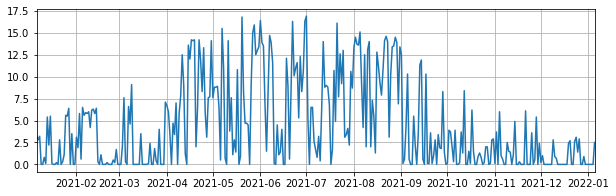

In [77]:
plt.figure(figsize=(10,3))
plt.plot(tid,sol)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

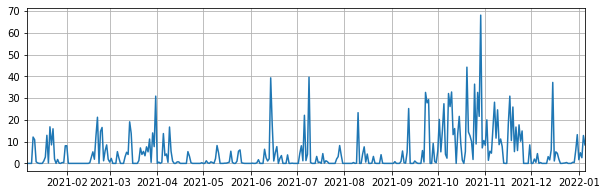

In [78]:
plt.figure(figsize=(10,3))
plt.plot(tid,nedbør)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

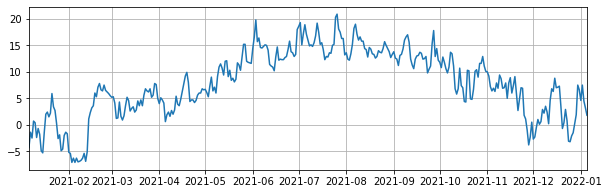

In [79]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

In [2]:
from yr.libyr import Yr
import numpy as np
#import json


In [5]:
weather = Yr(coordinates=[60,14])
now = weather.now(as_json=True)

print(now)

{
    "@datatype": "forecast",
    "@from": "2022-01-06T16:00:00Z",
    "@to": "2022-01-06T16:00:00Z",
    "location": {
        "@altitude": "303",
        "@latitude": "60",
        "@longitude": "14",
        "temperature": {
            "@id": "TTT",
            "@unit": "celsius",
            "@value": "-8.8"
        },
        "windDirection": {
            "@id": "dd",
            "@deg": "297.1",
            "@name": "NW"
        },
        "windSpeed": {
            "@id": "ff",
            "@mps": "2.3",
            "@beaufort": "2",
            "@name": "Svak vind"
        },
        "windGust": {
            "@id": "ff_gust",
            "@mps": "5.5"
        },
        "humidity": {
            "@unit": "percent",
            "@value": "89.5"
        },
        "pressure": {
            "@id": "pr",
            "@unit": "hPa",
            "@value": "1010.9"
        },
        "cloudiness": {
            "@id": "NN",
            "@percent": "0.1"
        },
        "fog": {

In [6]:
weather = Yr(location_name='Norge/Telemark/Skien/Skien')


In [5]:
now={
    "@from": "2014-06-04T08:00:00",
    "@to": "2014-06-04T12:00:00",
    "@period": "1",
    "symbol": {
        "@number": "3",
        "@numberEx": "3",
        "@name": "Partly cloudy",
        "@var": "03d"
    },
    "precipitation": {
        "@value": "0",
        "@minvalue": "0",
        "@maxvalue": "0.1"
    },
    "windDirection": {
        "@deg": "159.4",
        "@code": "SSE",
        "@name": "South-southeast"
    },
    "windSpeed": {
        "@mps": "1.3",
        "@name": "Light air"
    },
    "temperature": {
        "@unit": "celsius",
        "@value": "13"
    },
    "pressure": {
        "@unit": "hPa",
        "@value": "1012.1"
    }
}

In [6]:
now

{'@from': '2014-06-04T08:00:00',
 '@to': '2014-06-04T12:00:00',
 '@period': '1',
 'symbol': {'@number': '3',
  '@numberEx': '3',
  '@name': 'Partly cloudy',
  '@var': '03d'},
 'precipitation': {'@value': '0', '@minvalue': '0', '@maxvalue': '0.1'},
 'windDirection': {'@deg': '159.4',
  '@code': 'SSE',
  '@name': 'South-southeast'},
 'windSpeed': {'@mps': '1.3', '@name': 'Light air'},
 'temperature': {'@unit': 'celsius', '@value': '13'},
 'pressure': {'@unit': 'hPa', '@value': '1012.1'}}

In [13]:
np.float(now['windDirection']['@deg'])

159.4